In [1]:
import numpy as np
from matplotlib import pyplot as plt

def compute_tensor(x, t):
    T_e = np.array([[4 * x[0] * t,              0.5 * t * (1 + x[1] ** 2), 0],
                    [0.5 * t * (1 + x[1] ** 2), 3 * x[0] * x[1] ** 2 * t,  0],
                    [0,                         0,                         0]])

    E_0 = np.mean(T_e.diagonal())

    T_s = np.identity(3) * E_0

    T_d = T_e - T_s

    H = np.sqrt(2 * (T_e * T_e.transpose()).sum())
    
    return T_e, T_s, T_d, H

def compute_velocity_field(x, t):
    v = np.zeros((len(x[0]), len(x[1]), len(x[2]), 3))
    
    v[:, :, :, 0] = 2 * x[0] ** 2 * t + x[1] * t
    v[:, :, :, 1] = x[0] * x[1] ** 3 * t
    v[:, :, :, 2] = 0
    
    return v

def vector_plot(x, v):
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.quiver(x[0][0, :, 0], x[1][:, 0, 0],  v[:, :, 0], v[:, :, 1])
    ax.set_aspect('equal')

    plt.show()
    
def vector_plot_3d(x, v):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(projection='3d')
    ax.quiver(x[0], x[1], x[2], v[:, :, :, 0], v[:, :, :, 1], v[:, :, :, 2], length=0.05, normalize=True)
    
    plt.show()

In [2]:
t = 1
T_e, T_s, T_d, H = compute_tensor([1, 1, 1], t)

print("T_s:\n", T_s, "\n")
print("T_d:\n", T_d, "\n")

T_s:
 [[2.33333333 0.         0.        ]
 [0.         2.33333333 0.        ]
 [0.         0.         2.33333333]] 

T_d:
 [[ 1.66666667  1.          0.        ]
 [ 1.          0.66666667  0.        ]
 [ 0.          0.         -2.33333333]] 



In [3]:
x = np.meshgrid(np.linspace(0, 2, 10),
                np.linspace(0, 2, 10),
                np.linspace(0, 2, 10))


v = compute_velocity_field(x, 1)

v:
 [[[0.00000000e+00 0.00000000e+00 0.00000000e+00]
  [9.87654321e-02 0.00000000e+00 0.00000000e+00]
  [3.95061728e-01 0.00000000e+00 0.00000000e+00]
  [8.88888889e-01 0.00000000e+00 0.00000000e+00]
  [1.58024691e+00 0.00000000e+00 0.00000000e+00]
  [2.46913580e+00 0.00000000e+00 0.00000000e+00]
  [3.55555556e+00 0.00000000e+00 0.00000000e+00]
  [4.83950617e+00 0.00000000e+00 0.00000000e+00]
  [6.32098765e+00 0.00000000e+00 0.00000000e+00]
  [8.00000000e+00 0.00000000e+00 0.00000000e+00]]

 [[2.22222222e-01 0.00000000e+00 0.00000000e+00]
  [3.20987654e-01 2.43865264e-03 0.00000000e+00]
  [6.17283951e-01 4.87730529e-03 0.00000000e+00]
  [1.11111111e+00 7.31595793e-03 0.00000000e+00]
  [1.80246914e+00 9.75461058e-03 0.00000000e+00]
  [2.69135802e+00 1.21932632e-02 0.00000000e+00]
  [3.77777778e+00 1.46319159e-02 0.00000000e+00]
  [5.06172840e+00 1.70705685e-02 0.00000000e+00]
  [6.54320988e+00 1.95092212e-02 0.00000000e+00]
  [8.22222222e+00 2.19478738e-02 0.00000000e+00]]

 [[4.4444444

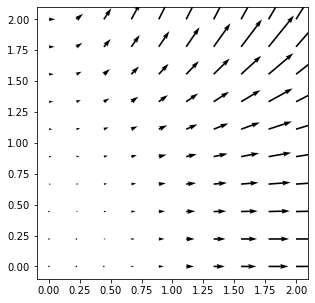

In [4]:
vector_plot(x, v[:, :, 0, :])

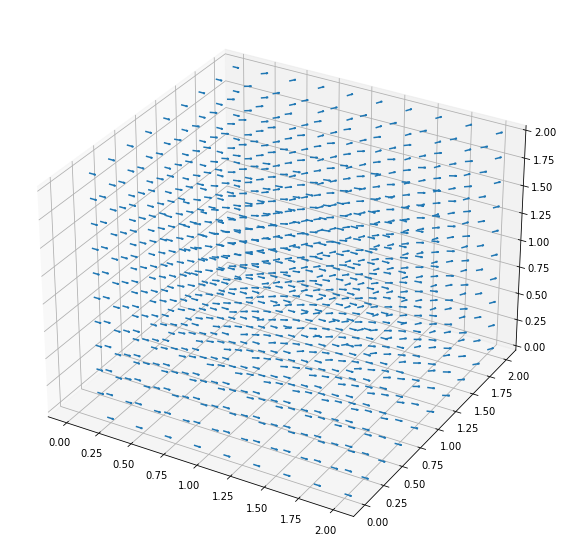

In [5]:
vector_plot_3d(x, v)